# Marketing

2024-10-09

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("data/staySpain_transformed.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9650 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 9650 non-null   int64         
 1   name                         9650 non-null   object        
 2   description                  9650 non-null   object        
 3   host_id                      9650 non-null   int64         
 4   neighbourhood_name           9650 non-null   object        
 5   neighbourhood_district       5860 non-null   object        
 6   room_type                    9650 non-null   object        
 7   accommodates                 9650 non-null   int64         
 8   bathrooms                    9576 non-null   Int64         
 9   bedrooms                     9581 non-null   Int64         
 10  beds                         9605 non-null   Int64         
 11  amenities_list               9634 non-null   obj

### Propósitom

Encontrar barrios y ciudades con potencial de optimización teniendo en cuenta:
- **Reseñas**
- **Puntuació de la zona**
- **Disponibilidad / Ocupación**

In [4]:
df = df[['apartment_id', 'room_type', 'city', 'zona', 'ocup%30', 'price',
         'review_scores_rating', 'review_scores_location', 'reviews_per_month', 'number_of_reviews']]

In [5]:
#df.info()

In [6]:
df.groupby(by='city').apartment_id.count()

city
Barcelona    2719
Girona       1485
Madrid       2134
Malaga        504
Mallorca     1583
Menorca       218
Sevilla       494
Valencia      513
Name: apartment_id, dtype: int64

- Está el alojamiento a la cola (33% más malo) en una variable (ejemplo ocupación?) pues FLAG
- Buscar barrios que tengan FLAG en todo y considerar esos barrios
- darle importancia a los barrios que tengan mayor número de alojamientos
  

- se puede hacer el análisis para cada ciudad (agrupando por ciudad) ?


## Ciudades

### Ciudades con ocupación por debajo de la media nacional

Ordenadas por número de alojamientos. 

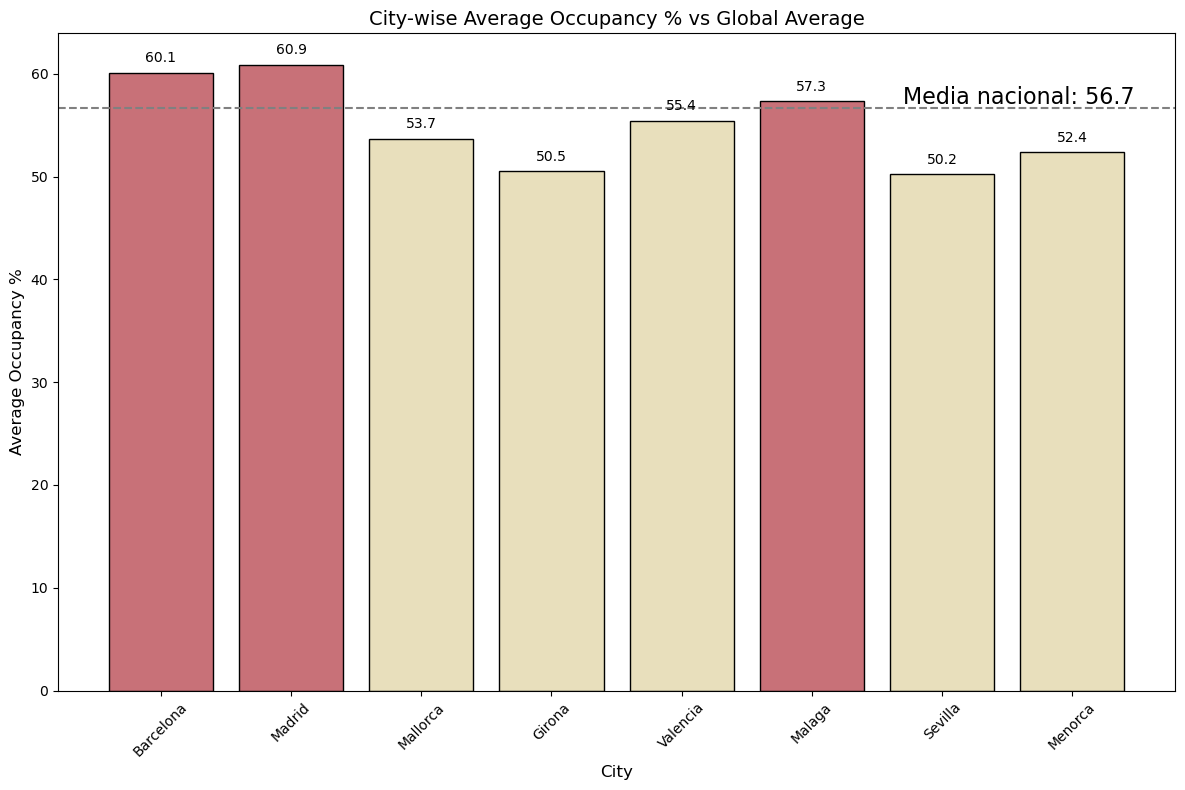

In [7]:
# Step 1: Calculate averages and number of accommodations per city
city_summary = df.groupby('city').agg(
    avg_ocup=pd.NamedAgg(column='ocup%30', aggfunc='mean'),
    num_accommodations=pd.NamedAgg(column='ocup%30', aggfunc='count')
).reset_index()

# Step 2: Sort by number of accommodations (more registers first)
city_summary = city_summary.sort_values(by='num_accommodations', ascending=False)

# Step 3: Calculate the global average occupancy percentage
global_avg = df['ocup%30'].mean()

# Step 4: Create the Bar Chart
plt.figure(figsize=(12, 8))

# Create bars colored based on status
#colors = np.where(city_summary['avg_ocup'] > global_avg, '#4CAF50', '#F44336')
colors = np.where(city_summary['avg_ocup'] > global_avg, '#C87178', '#E8DFBC')

bars = plt.bar(city_summary['city'], city_summary['avg_ocup'], color=colors, edgecolor='black')

# Global average line
plt.axhline(y=global_avg, color='grey', linestyle='--', label='Global Average')
plt.text(5.7, global_avg + 1, f'Media nacional: {global_avg:.1f}', color='black', va='center', fontsize=16)

# Adding titles and labels
plt.title('City-wise Average Occupancy % vs Global Average', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Occupancy %', fontsize=12)
plt.xticks(rotation=45)
#plt.legend()
#plt.grid(axis='y')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center')

plt.tight_layout()
plt.show()

### Review score location por ciudad

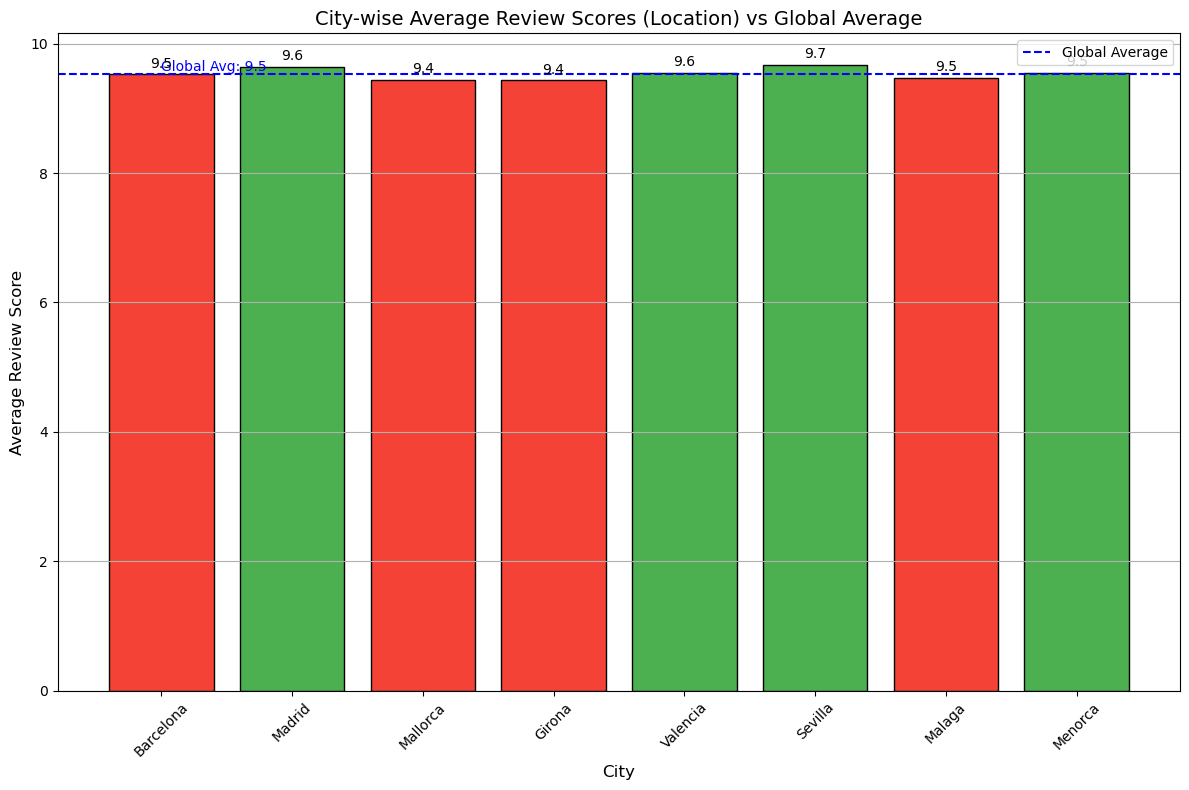

In [8]:

# Step 1: Calculate averages and number of accommodations per city
city_summary = df.groupby('city').agg(
    avg_review_score=pd.NamedAgg(column='review_scores_location', aggfunc='mean'),
    num_accommodations=pd.NamedAgg(column='review_scores_location', aggfunc='count')
).reset_index()

# Step 2: Sort by number of accommodations (more registers first)
city_summary = city_summary.sort_values(by='num_accommodations', ascending=False)

# Step 3: Calculate the global average review score
global_avg_review_score = df['review_scores_location'].mean()

# Step 4: Create the Bar Chart
plt.figure(figsize=(12, 8))

# Create bars colored based on status
colors = np.where(city_summary['avg_review_score'] > global_avg_review_score, '#4CAF50', '#F44336')

bars = plt.bar(city_summary['city'], city_summary['avg_review_score'], color=colors, edgecolor='black')

# Global average line
plt.axhline(y=global_avg_review_score, color='blue', linestyle='--', label='Global Average')
plt.text(0, global_avg_review_score + 0.1, f'Global Avg: {global_avg_review_score:.1f}', color='blue', va='center')

# Adding titles and labels
plt.title('City-wise Average Review Scores (Location) vs Global Average', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}', ha='center')

plt.tight_layout()
plt.show()


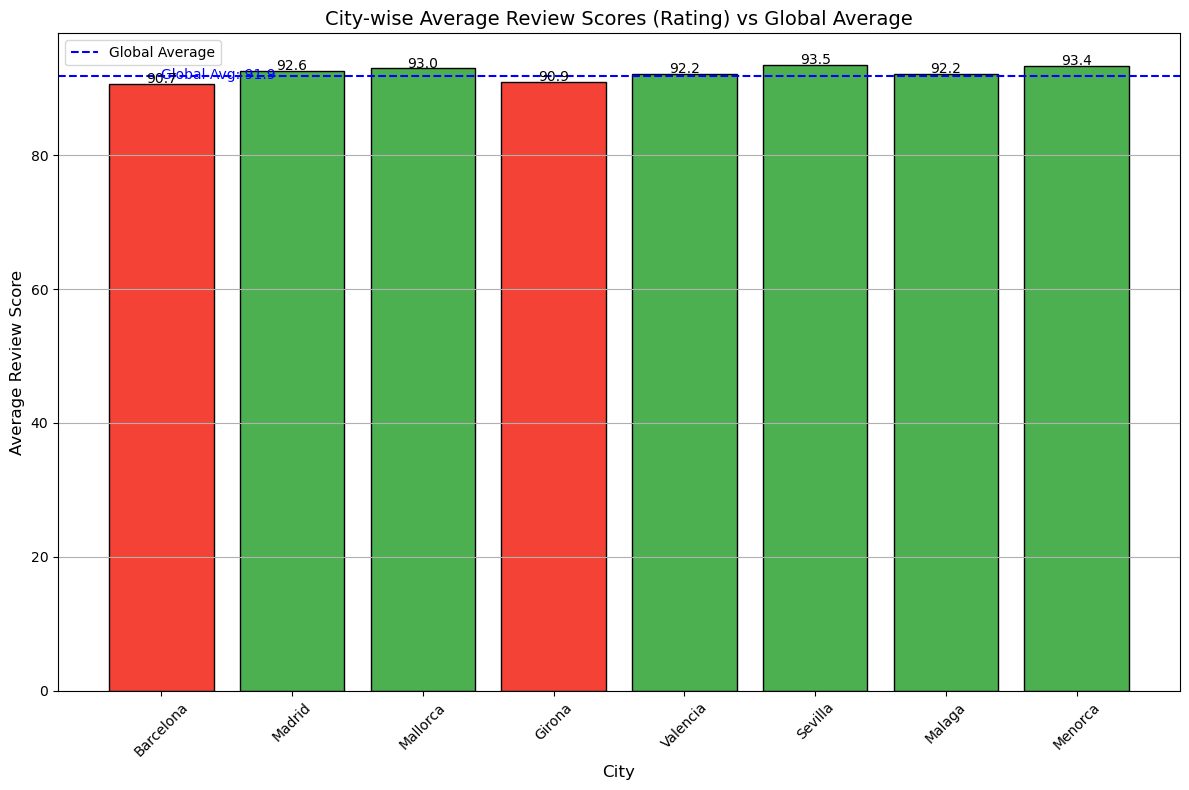

In [9]:
# Step 1: Calculate averages and number of accommodations per city using 'review_scores_rating'
city_summary = df.groupby('city').agg(
    avg_review_score=pd.NamedAgg(column='review_scores_rating', aggfunc='mean'),  # Update column
    num_accommodations=pd.NamedAgg(column='review_scores_rating', aggfunc='count')  # Update column
).reset_index()

# Step 2: Sort by number of accommodations (more registers first)
city_summary = city_summary.sort_values(by='num_accommodations', ascending=False)

# Step 3: Calculate the global average review score
global_avg_review_score = df['review_scores_rating'].mean()  # Update column

# Step 4: Create the Bar Chart
plt.figure(figsize=(12, 8))

# Create bars colored based on status
colors = np.where(city_summary['avg_review_score'] > global_avg_review_score, '#4CAF50', '#F44336')

bars = plt.bar(city_summary['city'], city_summary['avg_review_score'], color=colors, edgecolor='black')

# Global average line
plt.axhline(y=global_avg_review_score, color='blue', linestyle='--', label='Global Average')
plt.text(0, global_avg_review_score + 0.1, f'Global Avg: {global_avg_review_score:.1f}', color='blue', va='center')

# Adding titles and labels
plt.title('City-wise Average Review Scores (Rating) vs Global Average', fontsize=14)  # Update title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}', ha='center')

plt.tight_layout()
plt.show()

## Zonas - Distrito/barrio , Barrio o Población según alojamiento

### Zonas - Número de alojamientos

In [10]:
alojamientos_por_zona = df.groupby(by='zona').apartment_id.count().to_frame()

alojamientos_por_zona.rename(columns={'apartment_id': 'alojamientos'}, inplace=True)

In [11]:
print("total zonas:", alojamientos_por_zona.count())
print("zona con más alojamientos:", alojamientos_por_zona.max())
print("zona con menos alojamientos:", alojamientos_por_zona.min())

total zonas: alojamientos    523
dtype: int64
zona con más alojamientos: alojamientos    325
dtype: int64
zona con menos alojamientos: alojamientos    1
dtype: int64


### Zonas con al menos 20 alojamientos

In [12]:
# Step 1: Count occurrences in 'zona'
zone_counts = df['zona'].value_counts()

# Step 2: Filter for zones that appear at least 20 times
zones_to_keep = zone_counts[zone_counts >= 20].index

# Step 3: Filter the DataFrame
filtered_df = df[df['zona'].isin(zones_to_keep)]

In [13]:
filtered_df.zona.nunique()

107

In [14]:
filtered_df.apartment_id.count()

np.int64(7500)

#### 7500 alojamientos repartidos en 107 zonas relevantes

In [15]:
df = filtered_df

<Axes: ylabel='city'>

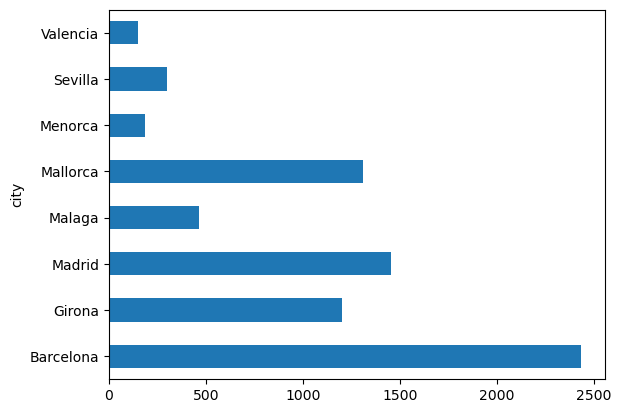

In [16]:
df.groupby(by='city').apartment_id.count().plot.barh()

### Zonas como registro

In [17]:
# Define the aggregation functions including count of apartments
agg_functions = {
    'room_type': lambda x: x.mode()[0],  # Most frequent
    'city': 'first',                      # First appearance
    'ocup%30': 'mean',                    # Mean
    'price': 'mean',                      # Mean
    'review_scores_rating': 'mean',       # Mean
    'review_scores_location': 'mean',     # Mean
    'reviews_per_month': 'mean',          # Mean
    'number_of_reviews': 'mean',           # Mean
    'apartment_id': 'count'                # Count of apartments
}

# Group by 'zona' and apply the aggregation functions
grouped_df = df.groupby('zona').agg(agg_functions).reset_index()

# Rename the last column to something more descriptive
grouped_df.rename(columns={'apartment_id': 'number_of_apartments'}, inplace=True)

In [18]:
grouped_df

,zona,room_type,city,ocup%30,price,review_scores_rating,review_scores_location,reviews_per_month,number_of_reviews,number_of_apartments
0,Barcelona_Ciutat Vella_El Barri Gtic,Private Room,Barcelona,54.191033,681.754047,89.682927,9.772358,189.398374,34.485380,171
1,Barcelona_Ciutat Vella_El Raval,Private Room,Barcelona,62.880259,793.717356,89.913043,9.478261,144.766871,27.436893,206
2,Barcelona_Ciutat Vella_La Barceloneta,Entire Home Apt,Barcelona,63.391813,781.228070,93.705882,9.882353,147.542857,9.403509,57
3,Barcelona_Ciutat Vella_Sant Pere Santa Caterin...,Private Room,Barcelona,63.389513,758.320225,91.903704,9.896296,137.918519,27.117978,178
4,Barcelona_Eixample_El Fort Pienc,Private Room,Barcelona,66.896552,1049.410253,90.871429,9.600000,144.385714,36.321839,87
...,...,...,...,...,...,...,...,...,...,...
102,Sevilla_Triana_Triana Casco Antiguo,Entire Home Apt,Sevilla,47.741935,790.161290,95.857143,9.928571,229.178571,59.258065,31
103,Valencia_Ciutat Vella_Sant Francesc,Entire Home Apt,Valencia,56.071429,683.571429,88.000000,9.625000,200.680000,55.142857,28
104,Valencia_L'Eixample_Russafa,Entire Home Apt,Valencia,47.519380,605.813953,91.972222,9.861111,162.815789,38.441860,43
105,Valencia_Poblats Maritims_Cabanyal-Canyamelar,Entire Home Apt,Valencia,53.333333,836.538462,94.088889,9.511111,192.600000,34.461538,52


In [19]:
df = grouped_df

### Flag - Marcar aquellas zonas con elementos en el percentil 33% del grupo ciudad

#### low_ocup : baja ocup%30

In [20]:
# Calculate the 33rd percentile for 'ocup%30' grouped by 'city'
percentiles = df.groupby('city')['ocup%30'].quantile(0.50).reset_index()
percentiles.columns = ['city', '33_percentile']

# Merge the percentiles back to the original DataFrame
df = df.merge(percentiles, on='city')

# Create the 'low_ocup' column
df['low_ocup'] = df['ocup%30'] <= df['33_percentile']

# Drop the temporary '33_percentile' column if not needed
df.drop(columns=['33_percentile'], inplace=True)

#### low_rating : bajo review_scores_rating

In [21]:
# Calculate the 33rd percentile for 'review_scores_rating' grouped by 'city'
percentiles = df.groupby('city')['review_scores_rating'].quantile(0.50).reset_index()
percentiles.columns = ['city', '33_percentile']

# Merge the percentiles back to the original DataFrame
df = df.merge(percentiles, on='city')

# Create the 'low_rating' column
df['low_rating'] = df['review_scores_rating'] <= df['33_percentile']

# Drop the temporary '33_percentile' column if not needed
df.drop(columns=['33_percentile'], inplace=True)

#### low_location : bajo review_scores_location

In [22]:
# Calculate the 33rd percentile for 'review_scores_location' grouped by 'city'
percentiles = df.groupby('city')['review_scores_location'].quantile(0.50).reset_index()
percentiles.columns = ['city', '33_percentile']

# Merge the percentiles back to the original DataFrame
df = df.merge(percentiles, on='city')

# Create the 'low_location' column
df['low_location'] = df['review_scores_location'] <= df['33_percentile']

# Drop the temporary '33_percentile' column if not needed
df.drop(columns=['33_percentile'], inplace=True)

#### low_number_of_reviews : bajo number_of_reviews

In [23]:
# Calculate the 33rd percentile for 'number_of_reviews' grouped by 'city'
percentiles = df.groupby('city')['number_of_reviews'].quantile(0.50).reset_index()
percentiles.columns = ['city', '33_percentile']

# Merge the percentiles back to the original DataFrame
df = df.merge(percentiles, on='city')

# Create the 'low_reviews' column
df['low_reviews'] = df['number_of_reviews'] <= df['33_percentile']

# Drop the temporary '33_percentile' column if not needed
df.drop(columns=['33_percentile'], inplace=True)


### Alojamientos con potencial : baja ocupación, valoración y puntución de zona

In [24]:
df[(df.low_ocup == True) & (df.low_rating == True) & (df.low_location == True)]

,zona,room_type,city,ocup%30,price,review_scores_rating,review_scores_location,reviews_per_month,number_of_reviews,number_of_apartments,low_ocup,low_rating,low_location,low_reviews
14,Barcelona_Les Corts_La Maternitat I Sant Ramon,Private Room,Barcelona,55.862069,667.586207,88.826087,9.086957,125.333333,15.000000,29,True,True,True,True
15,Barcelona_Les Corts_Les Corts,Private Room,Barcelona,60.238095,897.142857,90.833333,9.333333,128.444444,23.321429,28,True,True,True,True
17,Barcelona_Sant Mart_El Bess I El Maresme,Private Room,Barcelona,51.290323,567.741935,86.653846,8.230769,188.148148,24.419355,31,True,True,True,True
20,Barcelona_Sant Mart_El Parc I La Llacuna Del P...,Private Room,Barcelona,52.113821,751.707317,90.138889,9.222222,131.472222,54.756098,41,True,True,True,False
26,Barcelona_Sants-Montjuc_Sants - Badal,Private Room,Barcelona,61.333333,516.000000,90.333333,9.066667,138.250000,19.450000,20,True,True,True,True
27,Barcelona_Sarri-Sant Gervasi_El Putxet I El Farr,Entire Home Apt,Barcelona,50.761905,1048.400000,88.916667,8.958333,163.375000,32.485714,35,True,True,True,False
28,Barcelona_Sarri-Sant Gervasi_Sant Gervasi - Ga...,Entire Home Apt,Barcelona,49.791667,989.141154,89.920000,9.440000,59.400000,10.020833,48,True,True,True,True
38,Girona_Lloret De Mar,Entire Home Apt,Girona,48.236715,1282.075063,89.584416,9.337662,42.350649,5.108696,138,True,True,True,True
45,Girona_Tossa De Mar,Entire Home Apt,Girona,42.641509,1226.037736,89.285714,9.400000,40.457143,8.396226,53,True,True,True,False
57,Madrid_Chamber_Trafalgar,Entire Home Apt,Madrid,61.626016,851.869919,90.592593,9.666667,158.814815,31.780488,41,True,True,True,False


In [25]:
df[(df.low_ocup == True) & (df.low_rating == True) & (df.low_location == True)].number_of_apartments.sum()

np.int64(630)

### Filtrado adicional: número de reseñas

In [26]:
df[(df.low_ocup == True) & (df.low_rating == True) & (df.low_location == True) & (df.low_reviews == True)]

,zona,room_type,city,ocup%30,price,review_scores_rating,review_scores_location,reviews_per_month,number_of_reviews,number_of_apartments,low_ocup,low_rating,low_location,low_reviews
14,Barcelona_Les Corts_La Maternitat I Sant Ramon,Private Room,Barcelona,55.862069,667.586207,88.826087,9.086957,125.333333,15.000000,29,True,True,True,True
15,Barcelona_Les Corts_Les Corts,Private Room,Barcelona,60.238095,897.142857,90.833333,9.333333,128.444444,23.321429,28,True,True,True,True
17,Barcelona_Sant Mart_El Bess I El Maresme,Private Room,Barcelona,51.290323,567.741935,86.653846,8.230769,188.148148,24.419355,31,True,True,True,True
26,Barcelona_Sants-Montjuc_Sants - Badal,Private Room,Barcelona,61.333333,516.000000,90.333333,9.066667,138.250000,19.450000,20,True,True,True,True
28,Barcelona_Sarri-Sant Gervasi_Sant Gervasi - Ga...,Entire Home Apt,Barcelona,49.791667,989.141154,89.920000,9.440000,59.400000,10.020833,48,True,True,True,True
38,Girona_Lloret De Mar,Entire Home Apt,Girona,48.236715,1282.075063,89.584416,9.337662,42.350649,5.108696,138,True,True,True,True
68,Malaga_Cruz De Humilladero,Entire Home Apt,Malaga,54.444444,631.111111,89.708333,8.958333,87.250000,12.481481,27,True,True,True,True
92,Menorca_Es Mercadal,Entire Home Apt,Menorca,46.309524,1681.666667,90.590909,9.545455,28.681818,6.500000,28,True,True,True,True
97,Sevilla_Casco Antiguo_Feria,Entire Home Apt,Sevilla,44.285714,741.142857,94.064516,9.741935,159.516129,42.057143,35,True,True,True,True
